Now let's look at the second question of interest.  That is - What does the data suggest of Bootcamp grads in terms of job placement and salary?

Again, let's read in the data and necessary libraries.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../stackoverflow/survey-results-public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#In this case, we want to look at bootcamp data
#First - let's just look at how many people took a bootcamp in the dataset

bootcamp_df = df[df['TimeAfterBootcamp'].isnull()==False]
not_bootcamp_df = df[df['TimeAfterBootcamp'].isnull()==True] 
bootcamp_df.shape

(2602, 154)

In [7]:
# Looks like a reasonable sample of ~2600 people

#Additional questions about bootcamps - they suggest high salaries, placement, 
#helping those with non-traditional backgrounds and diversity break into tech... let's see what
#the data suggests.

In [12]:
bootcamp_df['Gender'].value_counts()/(bootcamp_df.shape[0] - sum(bootcamp_df['Gender'].isnull()))

Male                                                       0.863071
Female                                                     0.112494
Other                                                      0.006455
Gender non-conforming                                      0.005533
Male; Other                                                0.002766
Male; Gender non-conforming                                0.001383
Female; Gender non-conforming                              0.001383
Male; Transgender                                          0.000922
Male; Female; Transgender; Gender non-conforming; Other    0.000922
Transgender                                                0.000922
Transgender; Gender non-conforming                         0.000922
Female; Transgender; Gender non-conforming                 0.000922
Male; Female                                               0.000922
Male; Female; Transgender; Gender non-conforming           0.000461
Female; Gender non-conforming; Other            

In [13]:
not_bootcamp_df['Gender'].value_counts()/(not_bootcamp_df.shape[0] - sum(not_bootcamp_df['Gender'].isnull()))

Male                                                       0.903857
Female                                                     0.071659
Other                                                      0.006418
Male; Other                                                0.005019
Gender non-conforming                                      0.004501
Male; Gender non-conforming                                0.001886
Female; Transgender                                        0.001703
Transgender                                                0.001612
Female; Gender non-conforming                              0.000791
Male; Female                                               0.000395
Transgender; Gender non-conforming                         0.000395
Male; Female; Transgender; Gender non-conforming; Other    0.000395
Male; Transgender                                          0.000274
Female; Transgender; Gender non-conforming                 0.000182
Male; Female; Transgender; Gender non-conforming

In [14]:
#It does appear there is a small push for diversity overall by bootcamps, but not huge...

In [15]:
bootcamp_df['FormalEducation'].value_counts()/(bootcamp_df.shape[0] - sum(bootcamp_df['FormalEducation'].isnull()))

Bachelor's degree                                                    0.475019
Master's degree                                                      0.225211
Some college/university study without earning a bachelor's degree    0.162567
Secondary school                                                     0.069562
Doctoral degree                                                      0.022291
Professional degree                                                  0.016141
I prefer not to answer                                               0.011914
Primary/elementary school                                            0.009224
I never completed any formal education                               0.008071
Name: FormalEducation, dtype: float64

In [16]:
not_bootcamp_df['FormalEducation'].value_counts()/(not_bootcamp_df.shape[0] - sum(not_bootcamp_df['FormalEducation'].isnull()))

Bachelor's degree                                                    0.417565
Master's degree                                                      0.216335
Some college/university study without earning a bachelor's degree    0.157942
Secondary school                                                     0.117381
Doctoral degree                                                      0.025620
I prefer not to answer                                               0.022095
Primary/elementary school                                            0.020967
Professional degree                                                  0.013794
I never completed any formal education                               0.008301
Name: FormalEducation, dtype: float64

In [17]:
#In terms of formal education it looks basically the same - more bachelors degree holders do 
#bootcamps, but fewer phds do bootcamps.

In [18]:
bootcamp_df['TimeAfterBootcamp'].value_counts()/bootcamp_df.shape[0]

I already had a job as a developer when I started the program    0.458493
Immediately upon graduating                                      0.112990
I got a job as a developer before completing the program         0.096849
One to three months                                              0.087625
I haven't gotten a job as a developer yet                        0.081091
Less than a month                                                0.059954
Four to six months                                               0.040354
Longer than a year                                               0.032667
Six months to a year                                             0.029977
Name: TimeAfterBootcamp, dtype: float64

In [19]:
#So interestingly this data makes it more difficult to analyze the impact of bootcamps,
# as many of the students already had developer jobs before starting the program
# we could remove them?

#If you are truly new to the space, we can rule out that you already have a job as a developer
# then we can look at the other individuals and see which are still not 

not_devs = bootcamp_df[bootcamp_df['TimeAfterBootcamp']!="I already had a job as a developer when I started the program"]

In [20]:
not_devs['TimeAfterBootcamp'].value_counts()/not_devs.shape[0]

Immediately upon graduating                                 0.208659
I got a job as a developer before completing the program    0.178850
One to three months                                         0.161817
I haven't gotten a job as a developer yet                   0.149752
Less than a month                                           0.110717
Four to six months                                          0.074521
Longer than a year                                          0.060326
Six months to a year                                        0.055358
Name: TimeAfterBootcamp, dtype: float64

In [21]:
bootcamp_df[bootcamp_df['Salary']==195000]

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
1696,1697,Professional developer,"Yes, both",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),"10,000 or more employees",...,Disagree,Male,High school,White or of European descent,Disagree,Agree,Disagree,Agree,195000.0,NaN


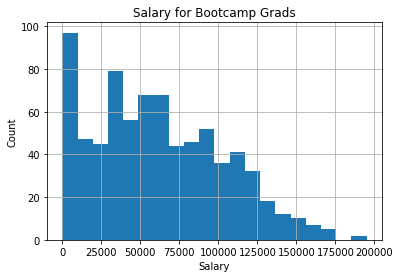

In [22]:
bootcamp_df['Salary'].hist(bins=20);
plt.title('Salary for Bootcamp Grads');
plt.xlabel('Salary');
plt.ylabel('Count');

In [23]:
bootcamp_df['Salary'].describe()

count       765.000000
mean      61775.438188
std       41797.379964
min           0.029364
25%       29520.430108
50%       56980.056980
75%       91397.849462
max      195000.000000
Name: Salary, dtype: float64

In [ ]:
#Here we can get some idea of how bootcamp grades fair, but this isn't straightforward.
#Many of these individuals are not new to the field, and the salaries are all over the place
#But the descriptive statistics here give us some ideas... just nothing really concrete